In [79]:
import json
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('data_raw.json', 'r')as read_file:
    data = json.load(read_file)

In [80]:

pd.set_option('display.max_rows', None)
 
pd.set_option('display.max_columns', None)

In [81]:
all_red = []
for name in data:
    if 'gilbert' in data[name]: 
        value = data[name]['gilbert']
        n_value = []
        for i, x in enumerate(value):
            if i%21 == 0:
                continue
            n_value.append(x)
        all_red.extend(n_value)


In [82]:
all_red = pd.DataFrame(data=all_red)

all_red_cat = all_red.loc[all_red['correctly']]
all_red_cat = all_red_cat.loc[all_red_cat['reaction_time']<5000] 
# all_red_cat = all_red_cat.loc[all_red_cat['reaction_time']>250]

all_red_data = all_red_cat['reaction_time'].to_numpy()

4444


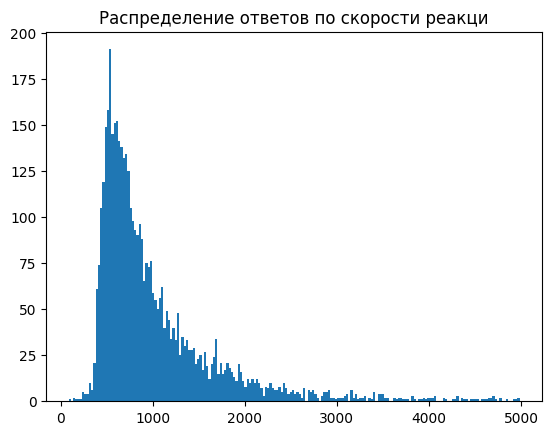

In [83]:
plt.title('Распределение ответов по скорости реакци')
plt.hist(all_red_data,  bins=200)
print(len(all_red_data))

In [84]:
from scipy.stats import lognorm, shapiro
import statsmodels.api as sm

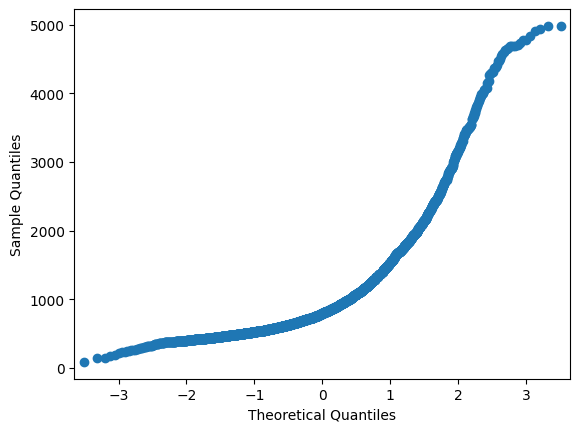

In [85]:

fig = sm.qqplot(all_red_data)

plt.show()

In [86]:
shapiro(all_red_data)

ShapiroResult(statistic=0.7585242986679077, pvalue=0.0)

In [87]:
goose_red = data['active_white_goose']['gilbert'][1:21]
goose_red = pd.DataFrame(data=goose_red)
goose_red_left = goose_red.loc[goose_red['direction']==1]
goose_red_right = goose_red.loc[goose_red['direction']==0]

goose_red_data = goose_red['reaction_time'].to_numpy()
goose_red

,correctly,target_color,position,reaction_time,direction,ground_color
0,True,0,4,1274,0,1
1,True,0,10,612,1,1
2,True,0,4,578,0,1
3,True,0,7,1124,1,1
4,True,0,6,723,1,1
5,True,0,0,866,0,1
6,True,0,3,1523,0,1
7,True,0,9,658,1,1
8,True,0,7,1364,1,1
9,True,0,5,1136,0,1


In [88]:
goose_red_left.describe()

,target_color,position,reaction_time,direction,ground_color
count,10.0,10.000000,10.000000,10.0,10.0
mean,0.0,8.200000,751.300000,1.0,1.0
std,0.0,1.398412,306.206557,0.0,0.0
min,0.0,6.000000,387.000000,1.0,1.0
25%,0.0,7.000000,563.250000,1.0,1.0
50%,0.0,8.500000,635.000000,1.0,1.0
75%,0.0,9.000000,912.750000,1.0,1.0
max,0.0,10.000000,1364.000000,1.0,1.0


In [89]:
goose_red_right.describe()

,target_color,position,reaction_time,direction,ground_color
count,10.0,10.00000,10.000000,10.0,10.0
mean,0.0,2.60000,1125.500000,0.0,1.0
std,0.0,1.95505,350.231749,0.0,0.0
min,0.0,0.00000,578.000000,0.0,1.0
25%,0.0,1.00000,916.750000,0.0,1.0
50%,0.0,3.00000,1063.000000,0.0,1.0
75%,0.0,4.00000,1272.500000,0.0,1.0
max,0.0,5.00000,1783.000000,0.0,1.0


20


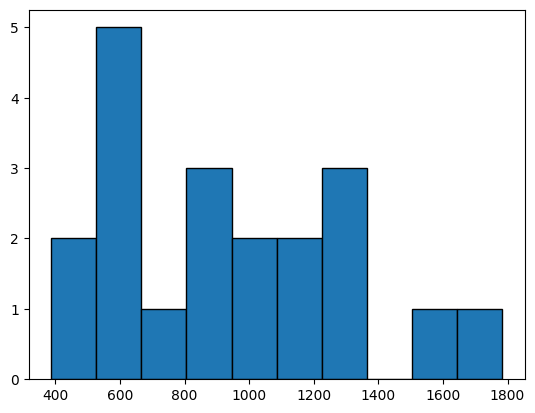

In [90]:

plt.hist(goose_red_data, edgecolor='black', bins=10)
print(len(goose_red_data))

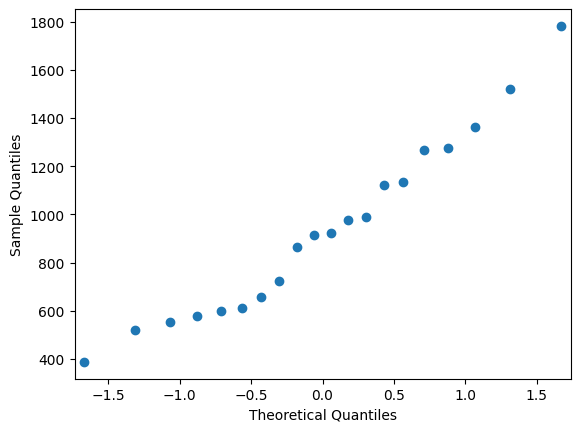

In [91]:

fig = sm.qqplot(goose_red_data)

plt.show()

In [92]:
shapiro(goose_red_data)

ShapiroResult(statistic=0.955613374710083, pvalue=0.46033990383148193)

In [93]:
goose_red_data

array([1274,  612,  578, 1124,  723,  866, 1523,  658, 1364, 1136,  551,
       1268,  976,  915, 1783,  387,  600,  922,  518,  990])